## These are the follow-up code samples for the following blog post: [Pandas DataFrame by Example](http://queirozf.com/entries/pandas-dataframe-by-example)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv",sep=',')

In [2]:
pd.__version__

'0.20.1'

In [3]:
df

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0
3,jeff,19,texas,1,5
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


## Select rows by position

In [4]:
# select the first 2 rows
df.iloc[:2]

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4


In [5]:
# select the last 2 rows
df.iloc[-2:]

,name,age,state,num_children,num_pets
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


## Select rows by index value

> compare this with `iloc` above

In [6]:
# select rows up to and including the one
# with index=2
df.loc[:2]

,name,age,state,num_children,num_pets
0,john,23,iowa,2,0
1,mary,78,dc,2,4
2,peter,22,california,0,0


## Select rows based upon the value of columns

In [7]:
# by a simple numeric condition
df[df["age"] > 30]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
4,bill,45,washington,2,0
5,lisa,33,dc,1,0


In [8]:
# comparing the value of two columns
df[ df["num_pets"] > df[ "num_children"] ]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4
3,jeff,19,texas,1,5


In [9]:
# using boolean AND
df[ (df["age"] > 40) & (df["num_pets"] > 0) ]

,name,age,state,num_children,num_pets
1,mary,78,dc,2,4


## Drop a column

In [10]:
df.drop(["age","num_children"],axis=1)

,name,state,num_pets
0,john,iowa,0
1,mary,dc,4
2,peter,california,0
3,jeff,texas,5
4,bill,washington,0
5,lisa,dc,0


## Apply a function to every column (as aggregates)

> Using **numpy** vectorized functions for numerical values

In [11]:
# get the mean for each of the selected columns
df[["age","num_pets","num_children"]].apply(lambda row: np.mean(row),axis=0)

age             36.666667
num_pets         1.500000
num_children     1.333333
dtype: float64

## Apply a function to every row (as aggregates)
> Using **numpy** vectorized functions for numerical values

In [12]:
# sum columns age, num_pets and num_children for each row
df[["age","num_pets","num_children"]].apply(lambda row: np.sum(row),axis=1)

0    25
1    84
2    22
3    25
4    47
5    34
dtype: int64

## Apply a function elementwise using apply

In [13]:
df[["age"]].apply(lambda value: value*2)

,age
0,46
1,156
2,44
3,38
4,90
5,66


In [14]:
# certain numerical functions can also be used:
df[["age"]] * 2

,age
0,46
1,156
2,44
3,38
4,90
5,66


In [15]:
# also works for string values
df[["name"]].apply(lambda value: value.str.upper())

,name
0,JOHN
1,MARY
2,PETER
3,JEFF
4,BILL
5,LISA


## Apply a function elementwise using map

> use `apply` for DataFrame objects and `map` for Series objects


In [16]:
df['name'].map(lambda name: name.upper())

0     JOHN
1     MARY
2    PETER
3     JEFF
4     BILL
5     LISA
Name: name, dtype: object

## Add new columns based on old ones

In [17]:
# simple sum of two columns
df["pets_and_children"] = df["num_pets"] + df["num_children"]
df

,name,age,state,num_children,num_pets,pets_and_children
0,john,23,iowa,2,0,2
1,mary,78,dc,2,4,6
2,peter,22,california,0,0,0
3,jeff,19,texas,1,5,6
4,bill,45,washington,2,0,2
5,lisa,33,dc,1,0,1


In [18]:
# you can also use custom functions we used on "elementwise application"
df["name_uppercase"] = df[["name"]].apply(lambda name: name.str.upper())
df

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
0,john,23,iowa,2,0,2,JOHN
1,mary,78,dc,2,4,6,MARY
2,peter,22,california,0,0,0,PETER
3,jeff,19,texas,1,5,6,JEFF
4,bill,45,washington,2,0,2,BILL
5,lisa,33,dc,1,0,1,LISA


## Shuffle rows

In [19]:
df.reindex(np.random.permutation(df.index))

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
0,john,23,iowa,2,0,2,JOHN
4,bill,45,washington,2,0,2,BILL
2,peter,22,california,0,0,0,PETER
3,jeff,19,texas,1,5,6,JEFF
1,mary,78,dc,2,4,6,MARY
5,lisa,33,dc,1,0,1,LISA


## Iterate over all rows

In [20]:
for index,row in df.iterrows():
    print("{0} has name: {1}".format(index,row["name"]))

0 has name: john
1 has name: mary
2 has name: peter
3 has name: jeff
4 has name: bill
5 has name: lisa


## Randomly sample rows

In [21]:
# sample 10 rows from df
random_indices = np.random.choice(df.index.values, 4, replace=False)

# iloc allows you to retrieve rows by their numeric indices
sampled_df = df.iloc[random_indices]
sampled_df

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
5,lisa,33,dc,1,0,1,LISA
4,bill,45,washington,2,0,2,BILL
0,john,23,iowa,2,0,2,JOHN
3,jeff,19,texas,1,5,6,JEFF


## Sort a dataframe

In [22]:
# sort by age, largest first
df.sort_values("age",ascending=False )

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
1,mary,78,dc,2,4,6,MARY
4,bill,45,washington,2,0,2,BILL
5,lisa,33,dc,1,0,1,LISA
0,john,23,iowa,2,0,2,JOHN
2,peter,22,california,0,0,0,PETER
3,jeff,19,texas,1,5,6,JEFF


In [23]:
# sort by num_pets descending then sort by age ascending
df.sort_values( ["num_pets","age"], ascending=[False,True] )

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
3,jeff,19,texas,1,5,6,JEFF
1,mary,78,dc,2,4,6,MARY
2,peter,22,california,0,0,0,PETER
0,john,23,iowa,2,0,2,JOHN
5,lisa,33,dc,1,0,1,LISA
4,bill,45,washington,2,0,2,BILL


## Plot data

> you need the `matplotlib` module for this!

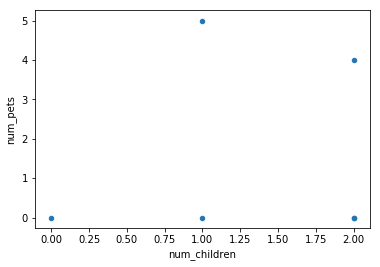

In [24]:
# show matplotlib plots here
%matplotlib inline

# a scatter plot comparing num_children and num_pets

df.plot(kind='scatter',x='num_children',y='num_pets')

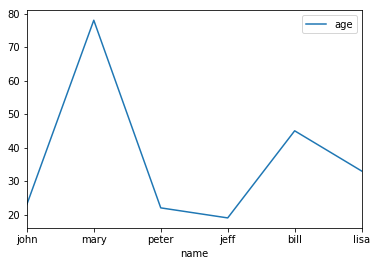

In [25]:
df.plot(kind='line',x='name',y='age')

## Perform complex selections using lambdas

In [26]:
df[df.apply(lambda row: row['name'].startswith('j'),axis=1)]

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
0,john,23,iowa,2,0,2,JOHN
3,jeff,19,texas,1,5,6,JEFF


In [27]:
pd.concat([df,pd.get_dummies(df["state"])],axis=1)

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase,california,dc,iowa,texas,washington
0,john,23,iowa,2,0,2,JOHN,0,0,1,0,0
1,mary,78,dc,2,4,6,MARY,0,1,0,0,0
2,peter,22,california,0,0,0,PETER,1,0,0,0,0
3,jeff,19,texas,1,5,6,JEFF,0,0,0,1,0
4,bill,45,washington,2,0,2,BILL,0,0,0,0,1
5,lisa,33,dc,1,0,1,LISA,0,1,0,0,0


## Change column names

In [28]:
# use inplace=True if you want to mutate the current dataframe
df.rename(columns={"age":"age_years"} )

,name,age_years,state,num_children,num_pets,pets_and_children,name_uppercase
0,john,23,iowa,2,0,2,JOHN
1,mary,78,dc,2,4,6,MARY
2,peter,22,california,0,0,0,PETER
3,jeff,19,texas,1,5,6,JEFF
4,bill,45,washington,2,0,2,BILL
5,lisa,33,dc,1,0,1,LISA


## Change column dtype

In [29]:
df['num_children'].dtype

dtype('int64')

In [30]:
# we don't need 64 bits for num_children
df['num_children'] = df['num_children'].astype('int32')
df['num_children'].dtype

dtype('int32')

## Veryfing that the dataframe includes specific values

This is done using the `.isin()` method, which returns a **boolean** dataframe to indicate where the passed values are.


In [31]:
# if the method is passed a simple list, it matches
# those values anywhere in the dataframe 
df.isin([2,4])

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
0,False,False,False,True,False,True,False
1,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False
5,False,False,False,False,False,False,False


In [32]:
# you can also pass a dict or another dataframe
# as argument
df.isin({'num_pets':[4,5]})

,name,age,state,num_children,num_pets,pets_and_children,name_uppercase
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False


## Create an empty Dataframe and append rows one by one

In [33]:
# set column names and dtypes
new_df = pd.DataFrame(columns=['col_a','col_b']).astype({'col_a':'float32', 'col_b':'int8'})


# must reassign since the append method does not work in place
new_df = new_df.append({'col_a':5,'col_b':10}, ignore_index=True)
new_df = new_df.append({'col_a':1,'col_b':100}, ignore_index=True)

new_df

,col_a,col_b
0,5.0,10
1,1.0,100


## Create from list of dicts

In [34]:
new_df = pd.DataFrame(columns=['id','name'])

data_dict = [
    {'id':1,'name':"john"},
    {'id':2,'name':"mary"},
    {'id':3,'name':"peter"}
]

# must reassign since the append method does not work in place

new_df = new_df.from_records(data_dict)
new_df

,id,name
0,1,john
1,2,mary
2,3,peter


In [35]:
new_df.reset_index(inplace=True)
new_df.drop('index',axis=1,inplace=True)
new_df

,id,name
0,1,john
1,2,mary
2,3,peter


## converting types

In [46]:
data_dict = {
    'name':['john','mary','peter'],
    "date_of_birth": ['27/05/2002','10/10/1999','01/04/1985']
}

df = pd.DataFrame(data_dict,columns=['name','date_of_birth'])
df

,name,date_of_birth
0,john,27/05/2002
1,mary,10/10/1999
2,peter,01/04/1985


In [47]:
df['date_of_birth']=pd.to_datetime(new_df['date_of_birth'],format='%d/%m/%Y')
df

,name,date_of_birth
0,john,2002-05-27
1,mary,1999-10-10
2,peter,1985-04-01


In [48]:
df.dtypes

name                     object
date_of_birth    datetime64[ns]
dtype: object